### CCTV 현황

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# CCTV 설치 현황
CCTV_Seoul = pd.read_excel("../Data/CCTV_in_Seoul_2018.xlsx")
CCTV_Seoul.head()

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671


In [3]:
CCTV_Seoul.tail()

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
20,용산구,2063,1279.0,152.0,201.0,107,102,89,60,73
21,은평구,2962,1365.0,83.0,99.0,343,180,296,229,367
22,종로구,1471,8.0,7.0,599.0,132,195,148,281,101
23,중구,1544,25.0,165.0,114.0,80,245,270,317,328
24,중랑구,1068,NaN,NaN,NaN,770,102,121,66,9


In [4]:
CCTV_Seoul.shape

(25, 10)

In [5]:

CCTV_Seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   기관명       25 non-null     object 
 1   소계        25 non-null     int64  
 2   2011년 이전  23 non-null     float64
 3   2012년     23 non-null     float64
 4   2013년     23 non-null     float64
 5   2014년     25 non-null     int64  
 6   2015년     25 non-null     int64  
 7   2016년     25 non-null     int64  
 8   2017년     25 non-null     int64  
 9   2018년     25 non-null     int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 2.1+ KB


In [7]:
# 기관명 -> 구별
CCTV_Seoul.rename(
    columns={
        '기관명' : '구별'
    }, inplace=True
)
CCTV_Seoul.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671


In [11]:
# NaN데이터의 위치 및 내용 확인
CCTV_Seoul[CCTV_Seoul['2011년 이전'].isna()]

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
10,동대문구,2003,NaN,NaN,NaN,1326,111,233,136,197
24,중랑구,1068,NaN,NaN,NaN,770,102,121,66,9


In [12]:
# NaN을 0으로 변환 
CCTV_Seoul = CCTV_Seoul.fillna(0)
CCTV_Seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   구별        25 non-null     object 
 1   소계        25 non-null     int64  
 2   2011년 이전  25 non-null     float64
 3   2012년     25 non-null     float64
 4   2013년     25 non-null     float64
 5   2014년     25 non-null     int64  
 6   2015년     25 non-null     int64  
 7   2016년     25 non-null     int64  
 8   2017년     25 non-null     int64  
 9   2018년     25 non-null     int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 2.1+ KB


----
### 인구현황

In [14]:
pop_Seoul = pd.read_excel("../Data/population_in_Seoul_2020.xlsx",
                        header=3, usecols="B,D,G,J,N"
                        )
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10013781,9733655,280126,1518239
1,종로구,161984,151217,10767,28073
2,중구,136469,126175,10294,23794
3,용산구,246165,229579,16586,39439
4,성동구,307193,299042,8151,44728


In [15]:
# 컬럼 이름 변경
pop_Seoul.columns = ['구별', '인구수', '한국인', '외국인', '고령자']
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10013781,9733655,280126,1518239
1,종로구,161984,151217,10767,28073
2,중구,136469,126175,10294,23794
3,용산구,246165,229579,16586,39439
4,성동구,307193,299042,8151,44728


In [16]:
# 합계 행을 삭제
pop_Seoul.drop(
    0,
    inplace=True
)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,161984,151217,10767,28073
2,중구,136469,126175,10294,23794
3,용산구,246165,229579,16586,39439
4,성동구,307193,299042,8151,44728
5,광진구,365990,350417,15573,48989


----
### CCTV현황

In [18]:
# CCTV 댓수가 가장 적은 순으로 Top5
CCTV_Seoul.sort_values(
    '소계'
).head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
9,도봉구,858,197.0,66.0,8.0,185,59,155,117,71
24,중랑구,1068,0.0,0.0,0.0,770,102,121,66,9
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
22,종로구,1471,8.0,7.0,599.0,132,195,148,281,101
23,중구,1544,25.0,165.0,114.0,80,245,270,317,328


In [19]:
# CCTV 댓수가 가장 많은 순으로 Top5
CCTV_Seoul.sort_values(
    '소계',
    ascending=False
).head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671
6,구로구,3227,852.0,219.0,349.0,187,268,326,540,486
16,성북구,3003,779.0,84.0,304.0,241,279,388,285,643
21,은평구,2962,1365.0,83.0,99.0,343,180,296,229,367


### 최근증가율로 제일 많이 증가한 구를 추출

In [25]:
# 최근증가율 = 최근 3년치 CCTV댓수 / 나머지 년도의 CCTV댓수 * 100
CCTV_Seoul['최근증가율'] = \
    CCTV_Seoul.loc[:,'2016년':'2018년'].sum(axis='columns') / \
    CCTV_Seoul.loc[:,'2011년 이전':'2015년'].sum(axis='columns') * 100
CCTV_Seoul.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근증가율
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448,52.171379
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385,82.960078
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319,83.068017
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254,77.887789
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671,99.150425


In [26]:
# 최근 증가율 Top5
CCTV_Seoul.sort_values(
    '최근증가율',
    ascending=False
).head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근증가율
23,중구,1544,25.0,165.0,114.0,80,245,270,317,328,145.468998
19,영등포구,2495,132.0,121.0,206.0,217,366,289,371,793,139.443378
15,성동구,2679,665.0,109.0,118.0,101,258,201,933,294,114.148681
7,금천구,1634,27.0,17.0,242.0,101,382,136,199,530,112.483745
5,광진구,1581,470.0,42.0,83.0,87,64,21,468,346,111.930295


---
### 인구현황

In [27]:
# 외국인 비율과 고령자 비율 컬럼 추가 
# 외국인 비율 = 외국인 / 인구수
# 고령자 비율 = 고령자 / 인구수
pop_Seoul['외국인비율'] = pop_Seoul.loc[:,'외국인'] / pop_Seoul.loc[:,'인구수'] * 100
pop_Seoul['고령자비율'] = pop_Seoul.loc[:,'고령자'] / pop_Seoul.loc[:,'인구수'] * 100

pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,161984,151217,10767,28073,6.646953,17.330724
2,중구,136469,126175,10294,23794,7.543105,17.435462
3,용산구,246165,229579,16586,39439,6.737757,16.021368
4,성동구,307193,299042,8151,44728,2.653381,14.560228
5,광진구,365990,350417,15573,48989,4.255034,13.385338


In [28]:
# 인구수가 제일 많은 지역 Top5
pop_Seoul.sort_values(
    '인구수',
    ascending=False
).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,680883,674095,6788,89539,0.996941,13.150424
16,강서구,595703,589302,6401,85992,1.074529,14.435381
23,강남구,549898,544804,5094,72602,0.926354,13.202812
11,노원구,535495,531037,4458,82682,0.832501,15.440294
21,관악구,516662,499374,17288,76664,3.346095,14.838328


In [29]:
# 외국인수가 많은 지역 Top5
pop_Seoul.sort_values(
    '외국인',
    ascending=False
).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,404766,371903,32863,59373,8.119012,14.668475
17,구로구,438308,405837,32471,67432,7.408261,15.384615
18,금천구,251370,232583,18787,38508,7.473843,15.319251
21,관악구,516662,499374,17288,76664,3.346095,14.838328
6,동대문구,362793,346156,16637,60367,4.585811,16.639516


In [30]:
# 외국인 비율 Top5
pop_Seoul.sort_values(
    '외국인비율',
    ascending=False
).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,404766,371903,32863,59373,8.119012,14.668475
2,중구,136469,126175,10294,23794,7.543105,17.435462
18,금천구,251370,232583,18787,38508,7.473843,15.319251
17,구로구,438308,405837,32471,67432,7.408261,15.384615
3,용산구,246165,229579,16586,39439,6.737757,16.021368


In [31]:
# 고령자수 Top5
pop_Seoul.sort_values(
    '고령자',
    ascending=False
).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,680883,674095,6788,89539,0.996941,13.150424
16,강서구,595703,589302,6401,85992,1.074529,14.435381
11,노원구,535495,531037,4458,82682,0.832501,15.440294
12,은평구,482509,478019,4490,82245,0.930553,17.045278
21,관악구,516662,499374,17288,76664,3.346095,14.838328


In [32]:
# 고령자 비율 Top5
pop_Seoul.sort_values(
    '고령자비율',
    ascending=False
).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,316750,312985,3765,61660,1.188635,19.466456
10,도봉구,333495,331238,2257,60023,0.676772,17.998171
2,중구,136469,126175,10294,23794,7.543105,17.435462
1,종로구,161984,151217,10767,28073,6.646953,17.330724
12,은평구,482509,478019,4490,82245,0.930553,17.045278


> 인구수가 제일 많은 지역은 송파구 이지만, 영등포구가 외국인이 제일 많다.     
그리고 그 근처라고 할 수 있는 구로구, 금천구 등도 외국인이 많다.    
송파구는 고령자가 많지만 고령자 비율이 높지 않은 것으로 확인 된다.     
하지만 강북구, 도봉구, 중구, 종로구, 은평구 같은 경우는 인구수 대비 고령자 비율이      
높기 때문에 추후 고령화가 우려 된다.   

----
### CCTV와 인구현황 합치기

In [33]:
data_result = pd.merge(
                    CCTV_Seoul,
                    pop_Seoul,
                    on='구별'
)
data_result.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448,52.171379,549898,544804,5094,72602,0.926354,13.202812
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385,82.960078,457042,452646,4396,66401,0.961837,14.528424
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319,83.068017,316750,312985,3765,61660,1.188635,19.466456
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254,77.887789,595703,589302,6401,85992,1.074529,14.435381
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671,99.150425,516662,499374,17288,76664,3.346095,14.838328


In [35]:
for i in data_result.columns[2:9+1]:
    del data_result[i]

data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,5221,52.171379,549898,544804,5094,72602,0.926354,13.202812
1,강동구,1879,82.960078,457042,452646,4396,66401,0.961837,14.528424
2,강북구,1265,83.068017,316750,312985,3765,61660,1.188635,19.466456
3,강서구,1617,77.887789,595703,589302,6401,85992,1.074529,14.435381
4,관악구,3985,99.150425,516662,499374,17288,76664,3.346095,14.838328


In [36]:
# 인덱스를 구별 컬럼으로 변경
data_result.set_index(
    '구별',
    inplace=True
)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,5221,52.171379,549898,544804,5094,72602,0.926354,13.202812
강동구,1879,82.960078,457042,452646,4396,66401,0.961837,14.528424
강북구,1265,83.068017,316750,312985,3765,61660,1.188635,19.466456
강서구,1617,77.887789,595703,589302,6401,85992,1.074529,14.435381
관악구,3985,99.150425,516662,499374,17288,76664,3.346095,14.838328


---
### 상관계수
- 상관계수의 절대값이 0.3이하 : 무시    
- 상관계수의 절대값이 0.3 ~ 0.5 : 약한 상관     
- 상관계수의 절대값이 0.5 ~ 0.7 : 상관       
- 상관계수의 절대값이 0.7 ~ : 뚜렷한 상관이 있다.    

In [37]:
# 인구수와 소계의 상관 관계
np.corrcoef(
    data_result['인구수'],
    data_result['소계']
)

array([[1.        , 0.38064812],
       [0.38064812, 1.        ]])

In [38]:
# 한국인과 소계의 상관 관계
np.corrcoef(
    data_result['한국인'],
    data_result['소계']
)

array([[1.        , 0.36453609],
       [0.36453609, 1.        ]])

In [39]:
# 외국인과 소계의 상관 관계
np.corrcoef(
    data_result['외국인'],
    data_result['소계']
)

array([[1.        , 0.17444235],
       [0.17444235, 1.        ]])

In [40]:
# 고령자와 소계의 상관 관계
np.corrcoef(
    data_result['고령자'],
    data_result['소계']
)

array([[1.        , 0.28638538],
       [0.28638538, 1.        ]])

In [41]:
# 외국인 비율과 소계의 상관 관계
np.corrcoef(
    data_result['외국인비율'],
    data_result['소계']
)

array([[ 1.        , -0.06215538],
       [-0.06215538,  1.        ]])

In [42]:
# 고령자비율 소계의 상관 관계
np.corrcoef(
    data_result['고령자비율'],
    data_result['소계']
)

array([[ 1.        , -0.44225083],
       [-0.44225083,  1.        ]])

In [43]:
# 정리가 되었으니 csv file로 저장
data_result.to_csv("../Data/CCTV_result.csv")

In [44]:
pd.read_csv("../Data/CCTV_result.csv")

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,5221,52.171379,549898,544804,5094,72602,0.926354,13.202812
1,강동구,1879,82.960078,457042,452646,4396,66401,0.961837,14.528424
2,강북구,1265,83.068017,316750,312985,3765,61660,1.188635,19.466456
3,강서구,1617,77.887789,595703,589302,6401,85992,1.074529,14.435381
4,관악구,3985,99.150425,516662,499374,17288,76664,3.346095,14.838328
5,광진구,1581,111.930295,365990,350417,15573,48989,4.255034,13.385338
6,구로구,3227,72.106667,438308,405837,32471,67432,7.408261,15.384615
7,금천구,1634,112.483745,251370,232583,18787,38508,7.473843,15.319251
8,노원구,1906,42.026826,535495,531037,4458,82682,0.832501,15.440294
9,도봉구,858,66.601942,333495,331238,2257,60023,0.676772,17.998171


---
### 시각화

In [45]:
import koreanize_matplotlib

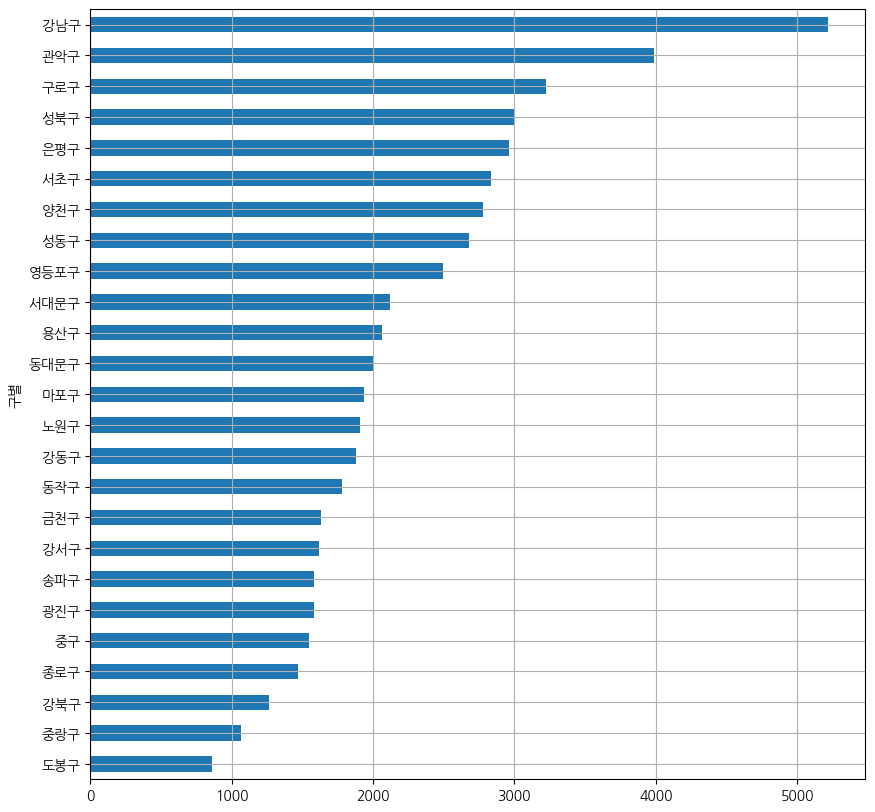

In [47]:
# 자치구별 CCTV 소계의 가로 막대 그래프

data_result['소계'].sort_values().plot(
    kind='barh',
    grid=True,
    figsize=(10, 10)
)
plt.show()

### 인구수 대비 CCTV 비율 

In [48]:
data_result['CCTV비율'] = data_result['소계'] / data_result['인구수'] * 100
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,5221,52.171379,549898,544804,5094,72602,0.926354,13.202812,0.949449
강동구,1879,82.960078,457042,452646,4396,66401,0.961837,14.528424,0.411122
강북구,1265,83.068017,316750,312985,3765,61660,1.188635,19.466456,0.399369
강서구,1617,77.887789,595703,589302,6401,85992,1.074529,14.435381,0.271444
관악구,3985,99.150425,516662,499374,17288,76664,3.346095,14.838328,0.771297


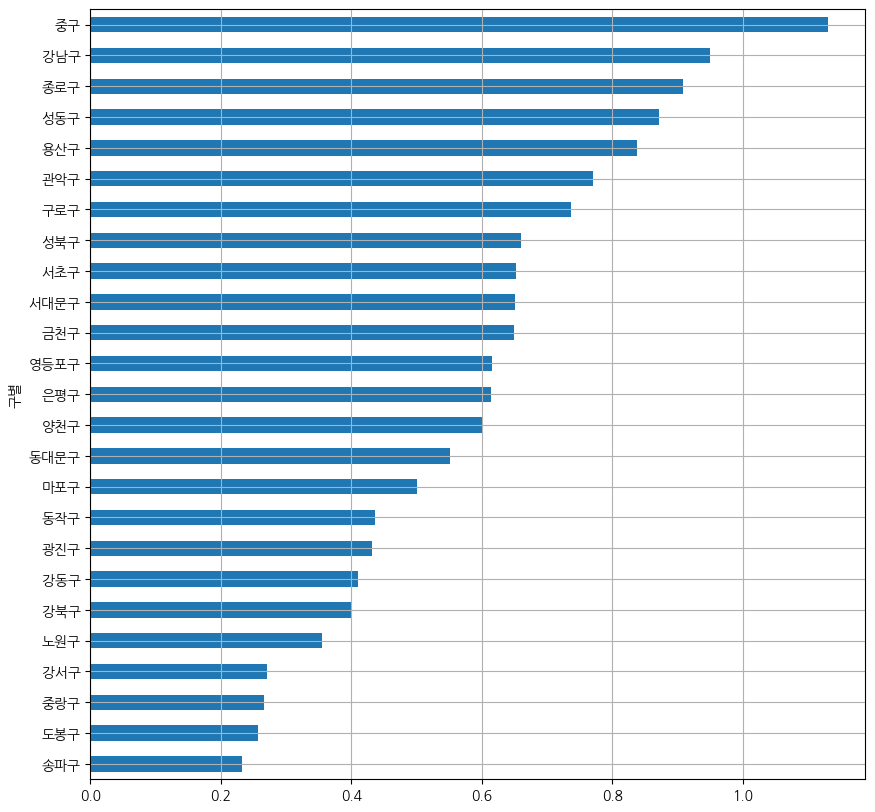

In [49]:
data_result['CCTV비율'].sort_values().plot(
    kind='barh',
    grid=True,
    figsize=(10, 10)
)
plt.show()

### 인구수 대비 적정한 CCTV 숫자 계산하기

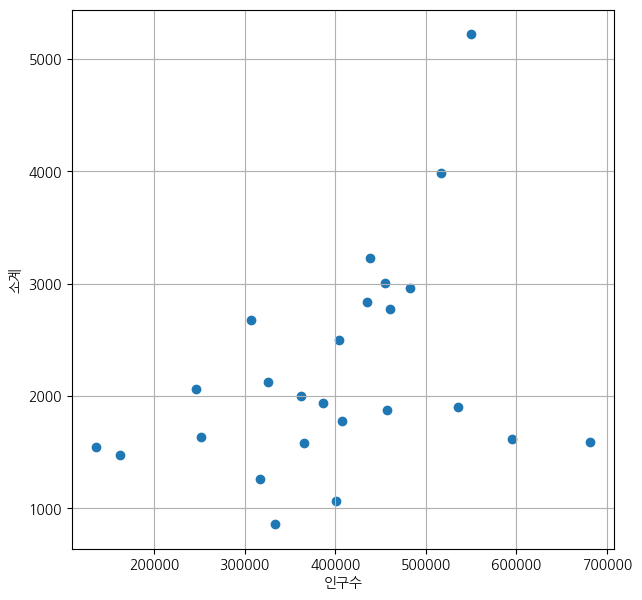

In [50]:
# 산점도를 이용한 시각화
plt.figure(figsize=(7,7))
plt.scatter(
    data_result['인구수'],
    data_result['소계']
)

plt.xlabel('인구수')
plt.ylabel('소계')
plt.grid()
plt.show()

In [51]:
# 인구수, 소계에 따른 기준직선(회귀선, 평균선) 만들기
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
fp1

array([2.88522756e-03, 1.06403852e+03])

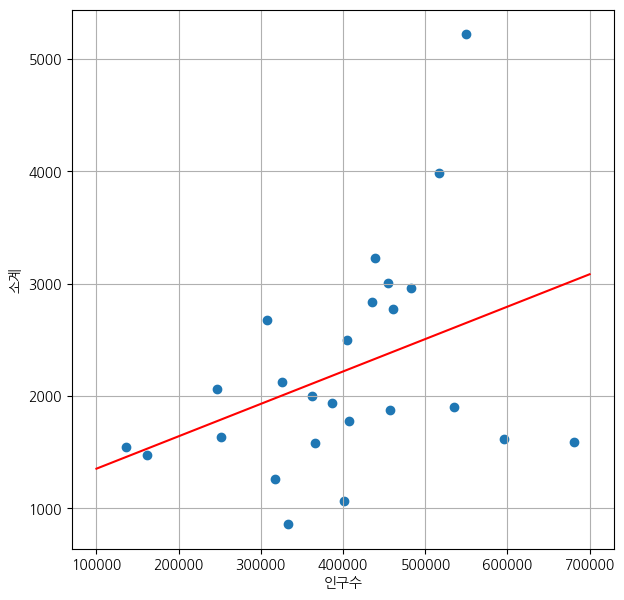

In [52]:
# y축 데이터 만들기
f1 = np.poly1d(fp1)

# x축 데이터 만들기
fx = np.linspace(100000, 700000)


# 산점도를 이용한 시각화
plt.figure(figsize=(7,7))
plt.scatter(
    data_result['인구수'],
    data_result['소계']
)

# 기준선(회귀선) 만들기
plt.plot(
    fx,
    f1(fx),
    color='red'
)

plt.xlabel('인구수')
plt.ylabel('소계')
plt.grid()
plt.show()

### 직선과의 오차를 구하는 공식과 오차가 큰 순으로 데이터 정렬후 그래프 그리기

In [53]:
# 소계에서 기준 CCTV댓수 차이로 오차값 구하기
data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,5221,52.171379,549898,544804,5094,72602,0.926354,13.202812,0.949449,2570.380612
강동구,1879,82.960078,457042,452646,4396,66401,0.961837,14.528424,0.411122,503.708698
강북구,1265,83.068017,316750,312985,3765,61660,1.188635,19.466456,0.399369,712.934353
강서구,1617,77.887789,595703,589302,6401,85992,1.074529,14.435381,0.271444,1165.777237
관악구,3985,99.150425,516662,499374,17288,76664,3.346095,14.838328,0.771297,1430.274035


In [54]:
# 오차 기준으로 정렬
df_sort = data_result.sort_values('오차', ascending=False)
df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,5221,52.171379,549898,544804,5094,72602,0.926354,13.202812,0.949449,2570.380612
송파구,1586,62.833676,680883,674095,6788,89539,0.996941,13.150424,0.232933,1442.540920
관악구,3985,99.150425,516662,499374,17288,76664,3.346095,14.838328,0.771297,1430.274035
도봉구,858,66.601942,333495,331238,2257,60023,0.676772,17.998171,0.257275,1168.247488
강서구,1617,77.887789,595703,589302,6401,85992,1.074529,14.435381,0.271444,1165.777237


---
### 그래프에 Text와 Color 적용

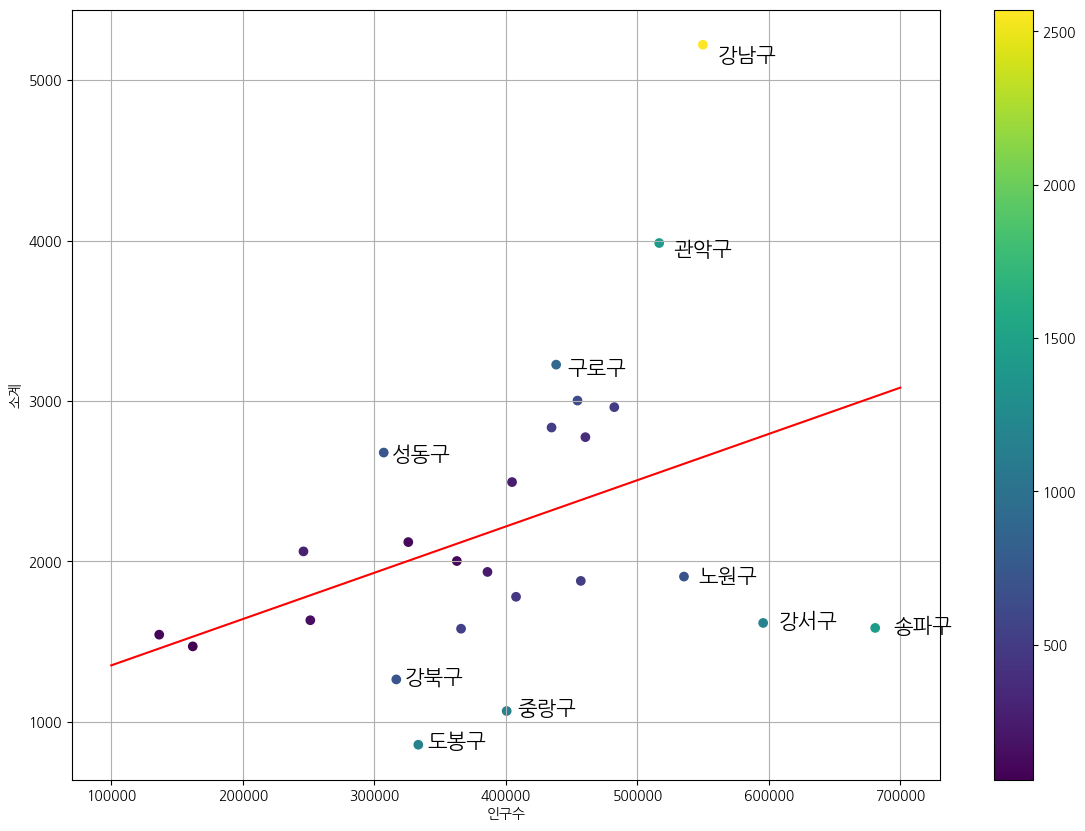

In [55]:
# y축 데이터 만들기
f1 = np.poly1d(fp1)

# x축 데이터 만들기
fx = np.linspace(100000, 700000)


# 산점도를 이용한 시각화
plt.figure(figsize=(14,10))
plt.scatter(
    data_result['인구수'],
    data_result['소계'],
    c=data_result['오차']
)

# 기준선(회귀선) 만들기
plt.plot(
    fx,
    f1(fx),
    color='red'
)

# 오차가 가장 큰 10개 구에 텍스트 넣기
for i in range(10):
    plt.text(
        df_sort.iloc[i, 2] * 1.02,
        df_sort.iloc[i, 0] * 0.98,
        df_sort.index[i],
        fontsize=15
    )


plt.xlabel('인구수')
plt.ylabel('소계')
plt.colorbar()
plt.grid()
plt.show()